In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import pyspark
#import datawig
from scipy.stats import skew
import pickle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
-
---df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
del df['url']
del df['address']
del df['phone']

In [ ]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

df.online_order = pd.to_numeric(df.online_order)
df.book_table = pd.to_numeric(df.book_table)

<ipython-input-28-aff6583492d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.online_order[df.online_order == 'Yes'] = 1
<ipython-input-28-aff6583492d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.online_order[df.online_order == 'No'] = 0
<ipython-input-28-aff6583492d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.book_table[df.book_table == 'Yes'] = 1
<ipython-input-28-aff6583492d4>:5: SettingWithCopyWarning: 
A v

In [ ]:
df4 = df['rate']
df['rate'] = df4.dropna().apply(lambda x: float(x.split('/')[0]) if (len(x)>3) else np.nan).dropna()
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,0,0,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [ ]:
df.describe()


,online_order,book_table,rate,votes
count,51717.000000,51717.000000,41665.000000,51717.000000
mean,0.588665,0.124698,3.700449,283.697527
std,0.492080,0.330379,0.440513,803.838853
min,0.000000,0.000000,1.800000,0.000000
25%,0.000000,0.000000,3.400000,7.000000
50%,1.000000,0.000000,3.700000,41.000000
75%,1.000000,0.000000,4.000000,198.000000
max,1.000000,1.000000,4.900000,16832.000000


In [ ]:
def comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
df['costfor2'] = df['approx_cost(for two people)'].apply(comma)
del df['approx_cost(for two people)']

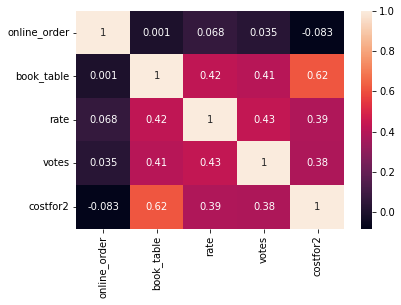

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

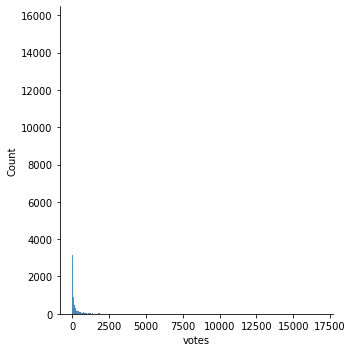

In [ ]:
sns.displot(df['votes'].dropna())

Text(0, 0.5, 'Density')

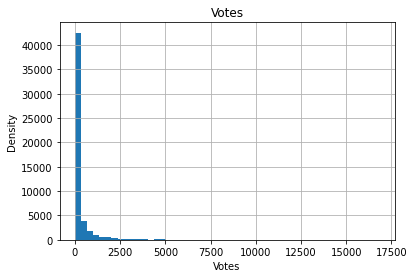

In [ ]:
fig=df.votes.hist(bins=50)
fig.set_title('Votes')
fig.set_xlabel('Votes')
fig.set_ylabel('Density')

Text(0, 0.5, 'Density')

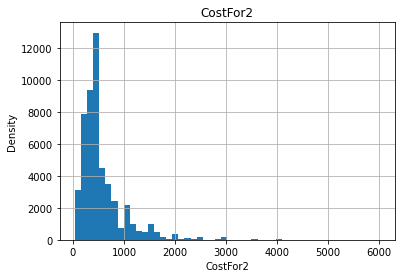

In [ ]:
fig=df.costfor2.hist(bins=50)
fig.set_title('CostFor2')
fig.set_xlabel('CostFor2')
fig.set_ylabel('Density')

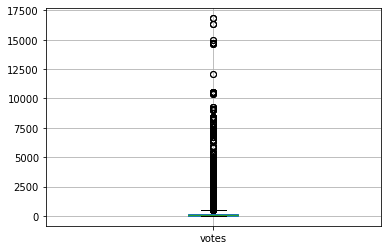

In [ ]:
fig=df.boxplot(column='votes')

In [ ]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
online_order,-0.360383,-1.870197
book_table,2.272035,3.162267
rate,-0.328601,-0.007483
votes,7.547819,88.866738
costfor2,2.601983,10.449886


In [ ]:
df['votes']=np.sqrt(df['votes'])

In [ ]:
df['costfor2']=np.sqrt(df['costfor2'])

In [ ]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
online_order,-0.360383,-1.870197
book_table,2.272035,3.162267
rate,-0.328601,-0.007483
votes,2.539908,9.350528
costfor2,1.293373,2.332410


Text(0, 0.5, 'Density')

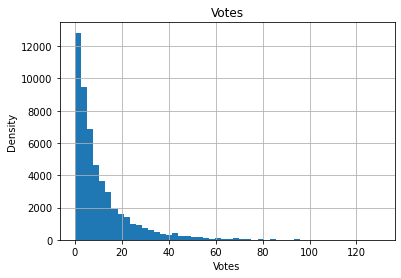

In [ ]:
fig=df.votes.hist(bins=50)
fig.set_title('Votes')
fig.set_xlabel('Votes')
fig.set_ylabel('Density')

Text(0, 0.5, 'Density')

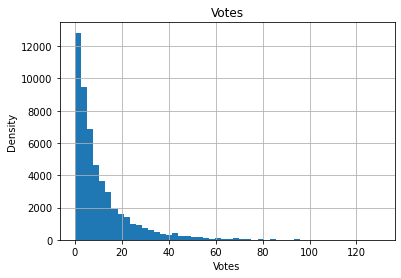

In [ ]:
fig=df.votes.hist(bins=50)
fig.set_title('Votes')
fig.set_xlabel('Votes')
fig.set_ylabel('Density')

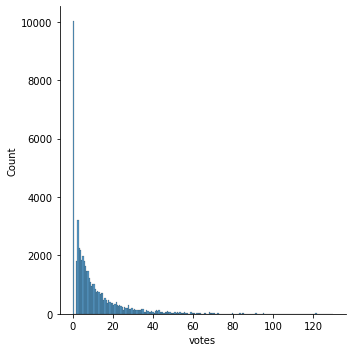

In [ ]:
sns.displot(df['votes'].dropna())

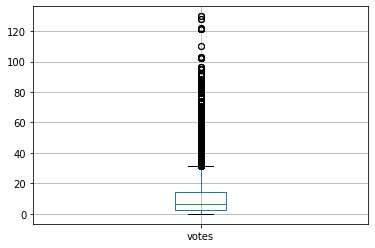

In [ ]:
fig=df.boxplot(column='votes')

In [ ]:
df = df.rename(columns={'approx_cost(for two people)':'costfor2','listed_in(type)':'type','listed_in(city)':'city'})

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [ ]:
df.duplicated().sum()

63

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [ ]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location           21
rest_type         227
dish_liked      28027
cuisines           45
reviews_list        0
menu_item           0
type                0
city                0
costfor2          345
dtype: int64

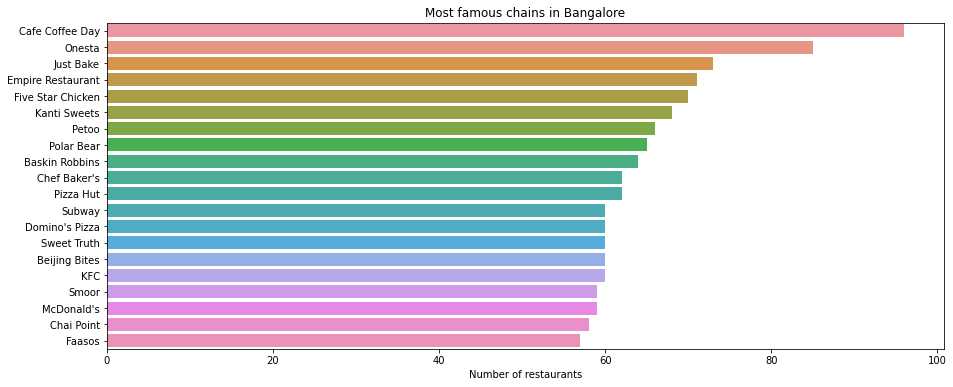

In [ ]:
plt.figure(figsize=(15, 6))
df1 = df['name'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Most famous chains in Bangalore')
plt.xlabel('Number of restaurants')
plt.show()

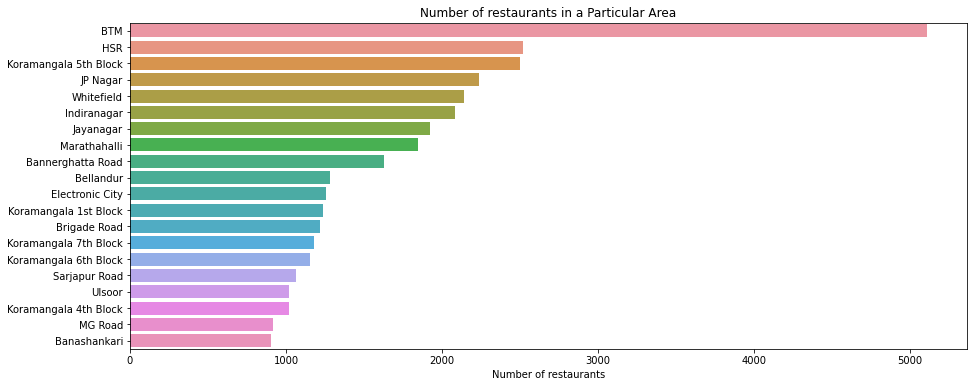

In [ ]:
plt.figure(figsize=(15, 6))
df1 = df['location'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Number of restaurants in a Particular Area')
plt.xlabel('Number of restaurants')
plt.show()

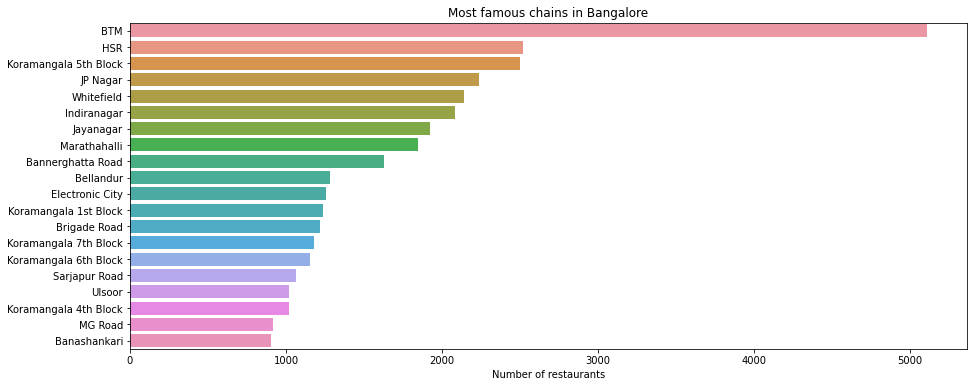

In [ ]:
plt.figure(figsize=(15, 6))
df1 = df['location'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Most famous chains in Bangalore')
plt.xlabel('Number of restaurants')
plt.show()

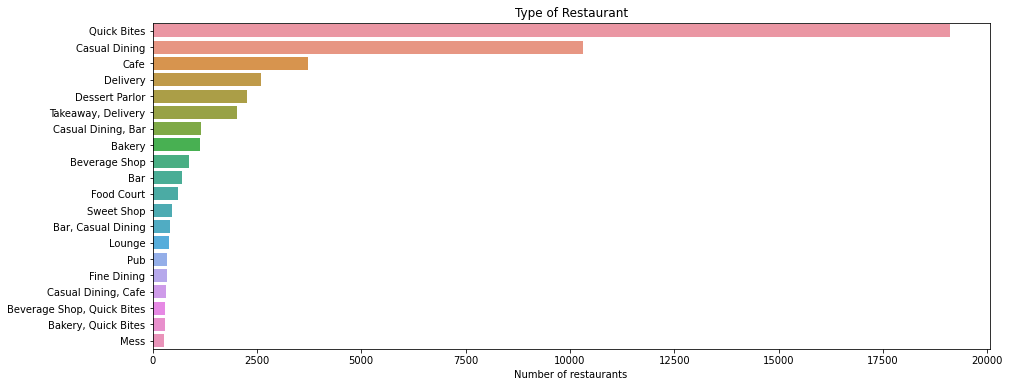

In [ ]:
plt.figure(figsize=(15, 6))
df1 = df['rest_type'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Type of Restaurant')
plt.xlabel('Number of restaurants')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurants taking online orders')

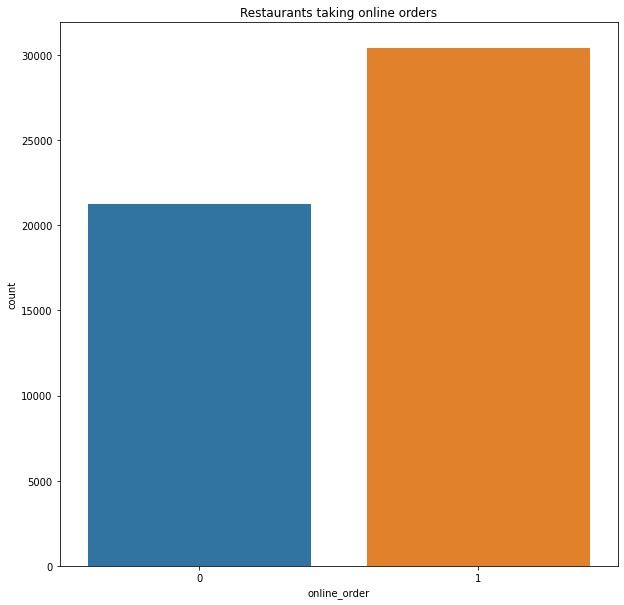

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df['online_order'])
plt.title('Restaurants taking online orders')

In [ ]:
df['online_order'].value_counts()

1    30395
0    21259
Name: online_order, dtype: int64

In [ ]:
df['book_table'].value_counts()

0    45215
1     6439
Name: book_table, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Table Booking')

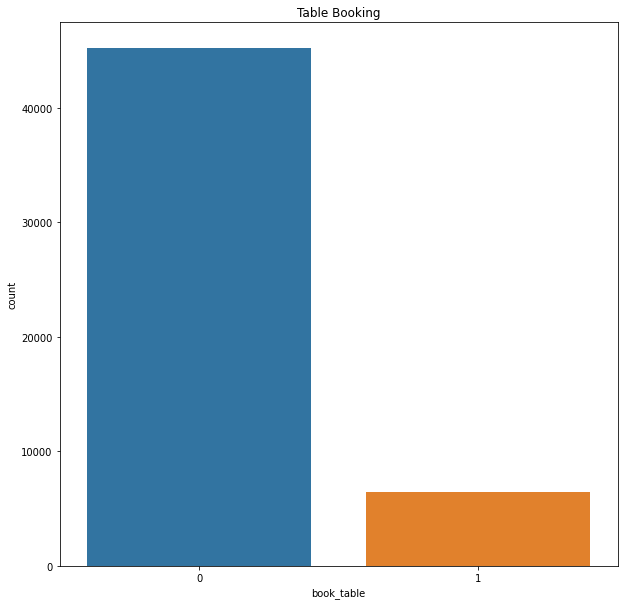

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(df['book_table'])
plt.title('Table Booking')

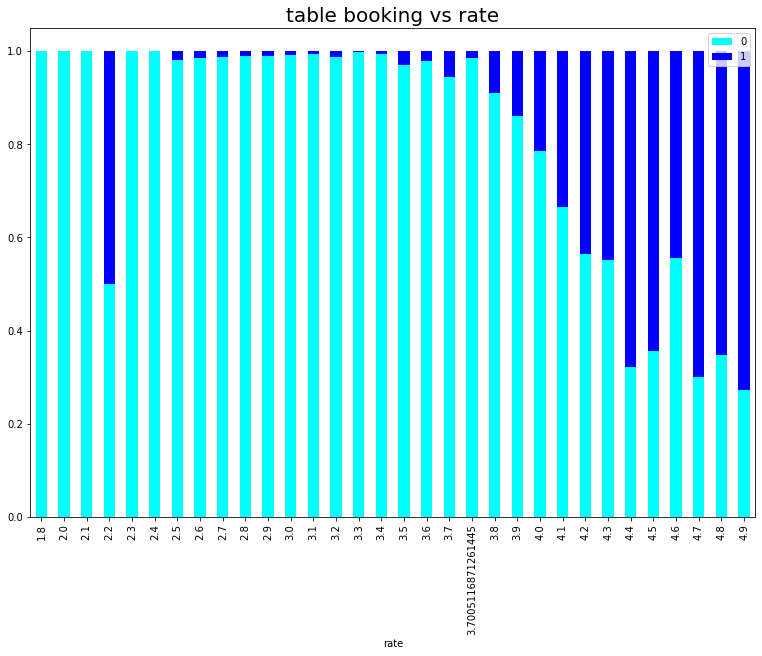

In [ ]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(df['rate'], df['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['cyan','blue'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

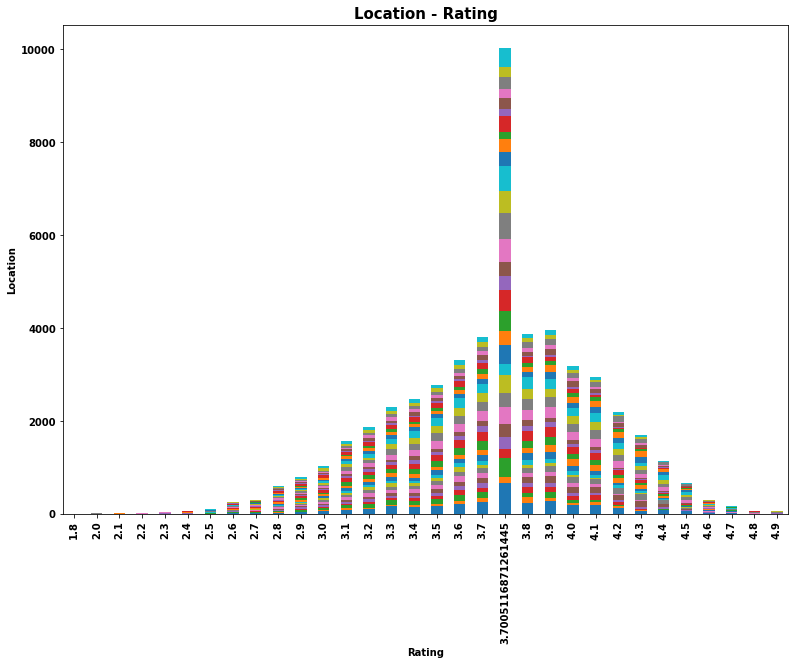

In [ ]:
#Location and Rating
loc_plt=pd.crosstab(df['rate'],df['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cost of Restuarant')

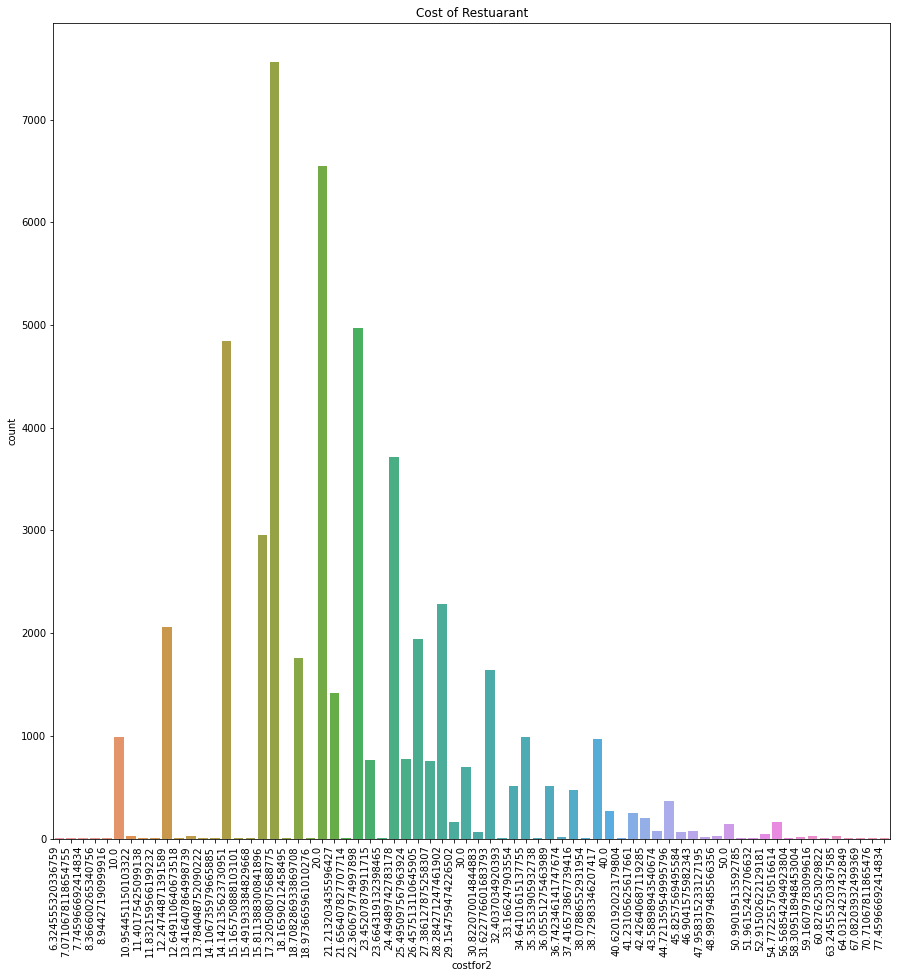

In [ ]:
#Cost of Restuarant
sns.countplot(df['costfor2'])
sns.countplot(df['costfor2']).set_xticklabels(sns.countplot(df['costfor2']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

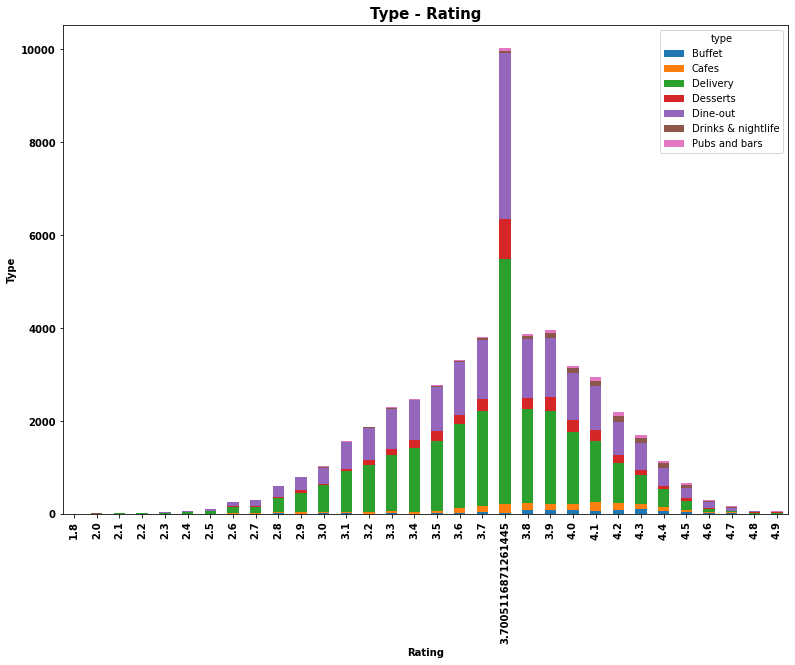

In [ ]:
#Type and Rating
type_plt=pd.crosstab(df['rate'],df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

<Figure size 504x360 with 0 Axes>

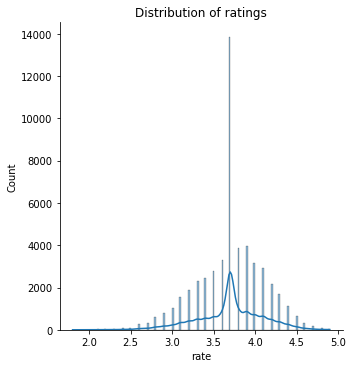

In [ ]:
plt.figure(figsize=(7, 5))
sns.displot(df['rate'], kde=True)
plt.title('Distribution of ratings')
plt.show()

In [ ]:
df['rate']

0        4.100000
1        4.100000
2        3.800000
3        3.700000
4        3.800000
           ...   
51712    3.600000
51713    3.700512
51714    3.700512
51715    4.300000
51716    3.400000
Name: rate, Length: 51654, dtype: float64

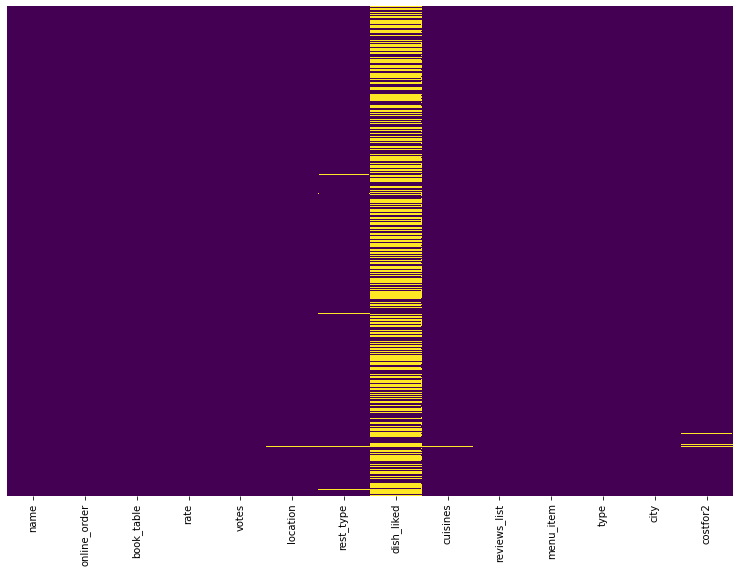

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

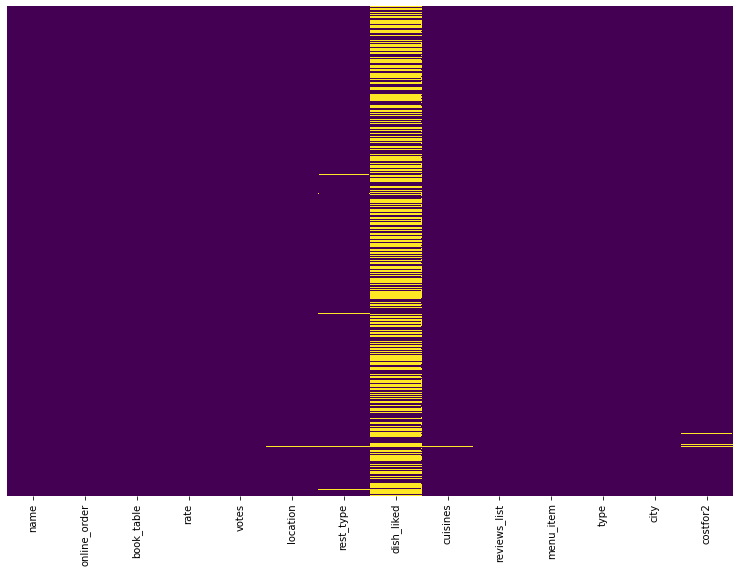

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
df['rate'].isnull().sum()

0

In [ ]:
df.drop(['menu_item','dish_liked'],axis=1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,type,city,costfor2
0,Jalsa,1,1,4.100000,27.838822,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,28.284271
1,Spice Elephant,1,0,4.100000,28.053520,Banashankari,Casual Dining,"Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,28.284271
2,San Churro Cafe,1,0,3.800000,30.298515,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,28.284271
3,Addhuri Udupi Bhojana,0,0,3.700000,9.380832,Banashankari,Quick Bites,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,17.320508
4,Grand Village,0,0,3.800000,12.884099,Basavanagudi,Casual Dining,"North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,24.494897
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.600000,5.196152,Whitefield,Bar,Continental,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield,38.729833
51713,Vinod Bar And Restaurant,0,0,3.700512,0.000000,Whitefield,Bar,Finger Food,[],Pubs and bars,Whitefield,24.494897
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.700512,0.000000,Whitefield,Bar,Finger Food,[],Pubs and bars,Whitefield,44.721360
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.300000,15.362291,"ITPL Main Road, Whitefield",Bar,Finger Food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield,50.000000


In [ ]:
df.dropna(inplace=True)


In [ ]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
reviews_list    0
menu_item       0
type            0
city            0
costfor2        0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


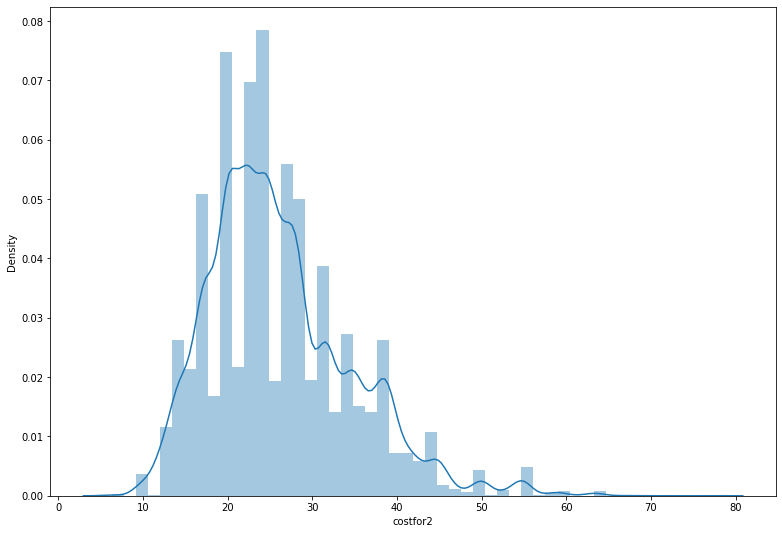

In [ ]:
sns.distplot(df['costfor2'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


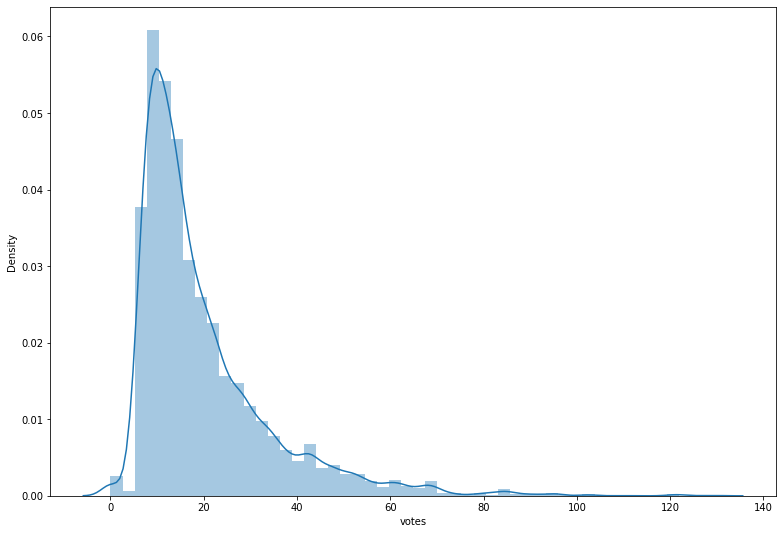

In [ ]:
sns.distplot(df['votes'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


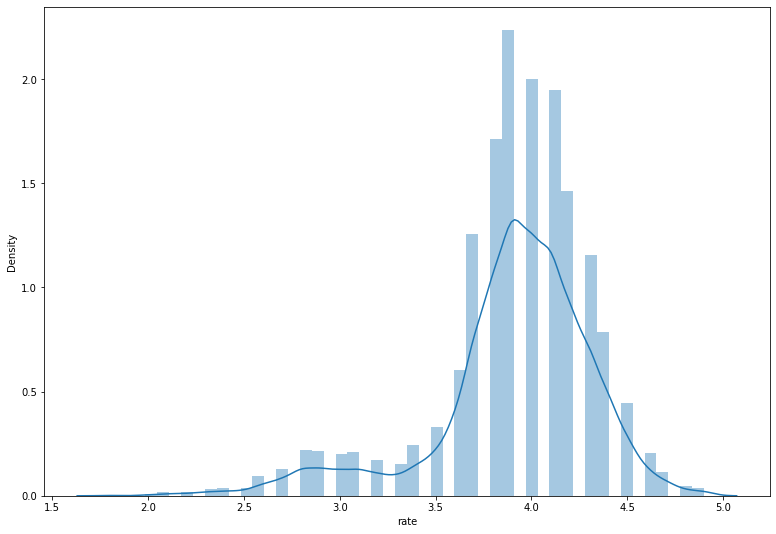

In [ ]:
sns.distplot(df['rate'])

In [ ]:
df = df.drop(['menu_item'],axis=1)

In [ ]:
df['rest_type'].value_counts()

Casual Dining                7393
Quick Bites                  5269
Cafe                         2383
Dessert Parlor               1085
Casual Dining, Bar            992
                             ... 
Fine Dining, Microbrewery       5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: rest_type, Length: 73, dtype: int64

In [ ]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,reviews_list,type,city,costfor2
0,Jalsa,1,1,4.1,27.838822,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,28.284271
1,Spice Elephant,1,0,4.1,28.053520,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,28.284271
2,San Churro Cafe,1,0,3.8,30.298515,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,28.284271
3,Addhuri Udupi Bhojana,0,0,3.7,9.380832,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,17.320508
4,Grand Village,0,0,3.8,12.884099,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,24.494897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,1,1,3.8,11.313708,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","[('Rated 3.0', ""RATED\n Nice place to hangout...",Pubs and bars,Whitefield,34.641016
51707,M Bar - Bengaluru Marriott Hotel Whitefield,0,0,3.9,8.774964,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"[('Rated 4.0', 'RATED\n Went there post dinne...",Pubs and bars,Whitefield,44.721360
51708,Keys Cafe - Keys Hotel,0,0,2.8,12.688578,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","[('Rated 3.0', 'RATED\n Place is good not tha...",Pubs and bars,Whitefield,34.641016
51711,Bhagini,0,0,2.5,9.000000,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian","[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield,28.284271


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.dish_liked = le.fit_transform(df.dish_liked)
df.type = le.fit_transform(df.type)
df.city = le.fit_transform(df.city)

In [ ]:
df = df.drop(['reviews_list'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,type,city,costfor2
0,Jalsa,1,1,4.1,27.838822,1,20,3628,1393,0,1,28.284271
1,Spice Elephant,1,0,4.1,28.053520,1,20,2950,596,0,1,28.284271
2,San Churro Cafe,1,0,3.8,30.298515,1,16,1409,485,0,1,28.284271
3,Addhuri Udupi Bhojana,0,0,3.7,9.380832,1,62,2752,1597,0,1,17.320508
4,Grand Village,0,0,3.8,12.884099,4,20,3435,1414,0,1,24.494897


In [ ]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,type,city,costfor2
0,Jalsa,1,1,4.1,27.838822,1,20,3628,1393,0,1,28.284271
1,Spice Elephant,1,0,4.1,28.053520,1,20,2950,596,0,1,28.284271
2,San Churro Cafe,1,0,3.8,30.298515,1,16,1409,485,0,1,28.284271
3,Addhuri Udupi Bhojana,0,0,3.7,9.380832,1,62,2752,1597,0,1,17.320508
4,Grand Village,0,0,3.8,12.884099,4,20,3435,1414,0,1,24.494897


In [ ]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

df.online_order = pd.to_numeric(df.online_order)
df.book_table = pd.to_numeric(df.book_table)

<ipython-input-81-aff6583492d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.online_order[df.online_order == 'Yes'] = 1
<ipython-input-81-aff6583492d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.online_order[df.online_order == 'No'] = 0
<ipython-input-81-aff6583492d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.book_table[df.book_table == 'Yes'] = 1
<ipython-input-81-aff6583492d4>:5: SettingWithCopyWarning: 
A v

In [ ]:
my_data=df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
my_data.to_csv('Zomato_df.csv')
my_data.head()


,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,type,city,costfor2
0,1,1,4.1,27.838822,1,20,3628,1393,0,1,28.284271
1,1,0,4.1,28.053520,1,20,2950,596,0,1,28.284271
2,1,0,3.8,30.298515,1,16,1409,485,0,1,28.284271
3,0,0,3.7,9.380832,1,62,2752,1597,0,1,17.320508
4,0,0,3.8,12.884099,4,20,3435,1414,0,1,24.494897


In [ ]:
x = df.iloc[:,[1,2,4,5,6,7,8,9,10,11]]
x.head()


,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,type,city,costfor2
0,1,1,27.838822,1,20,3628,1393,0,1,28.284271
1,1,0,28.053520,1,20,2950,596,0,1,28.284271
2,1,0,30.298515,1,16,1409,485,0,1,28.284271
3,0,0,9.380832,1,62,2752,1597,0,1,17.320508
4,0,0,12.884099,4,20,3435,1414,0,1,24.494897


In [ ]:
y = df['rate']
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

In [ ]:
x_train.info()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16396 entries, 49339 to 38866
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  16396 non-null  int64  
 1   book_table    16396 non-null  int64  
 2   votes         16396 non-null  float64
 3   location      16396 non-null  int64  
 4   rest_type     16396 non-null  int64  
 5   dish_liked    16396 non-null  int64  
 6   cuisines      16396 non-null  int64  
 7   type          16396 non-null  int64  
 8   city          16396 non-null  int64  
 9   costfor2      16396 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 1.4 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7028 entries, 18729 to 32268
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  7028 non-null   int64  
 1   book_table    7028 non-null   int64  
 2   votes         7028 non-null   fl

In [ ]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_predict=lr_model.predict(x_test)
r2_score(y_test,y_predict)

0.25355478348334004

In [ ]:
!pwd
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
r2_score(y_test,y_predict)

/content


0.8748874363889781

In [ ]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)
r2_score(y_test,y_predict)

0.9166431187464543

In [ ]:
#Use pickle to save our model so that we can use it later

import pickle 
# Saving model to disk
pickle.dump(ET_Model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.04647307007187364
Mean Squared Error: 0.014955474826472156
Root Mean Squared Error: 0.12229257878739885


In [ ]:
y_predict.shape

(7028,)

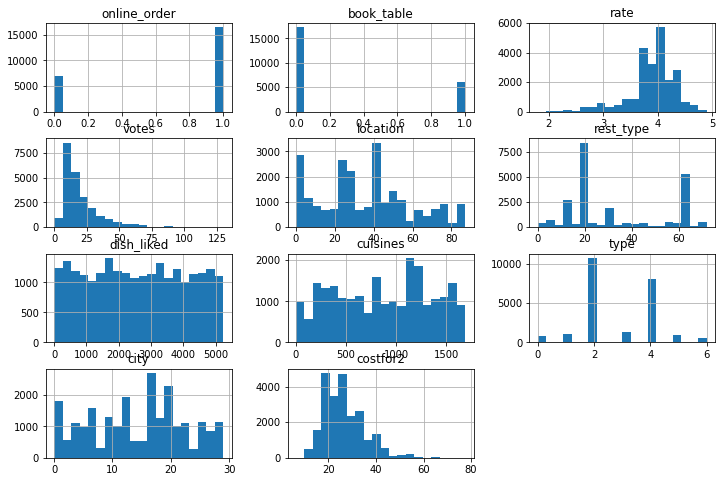

In [ ]:
df.hist(figsize=(12,8),bins=20)
plt.show()

In [ ]:
model.predict([[0,1,400,7,8,9,6,4,7,150]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


array([4.68833333])